In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the data into a Pandas dataframe
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60.56,50.20
...,...,...,...,...,...
min,1.00,NaN,18.00,15.00,1.00
25%,50.75,NaN,28.75,41.50,34.75
50%,100.50,NaN,36.00,61.50,50.00
75%,150.25,NaN,49.00,78.00,73.00


In [9]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [10]:
data['Age'].nunique()

51

In [11]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


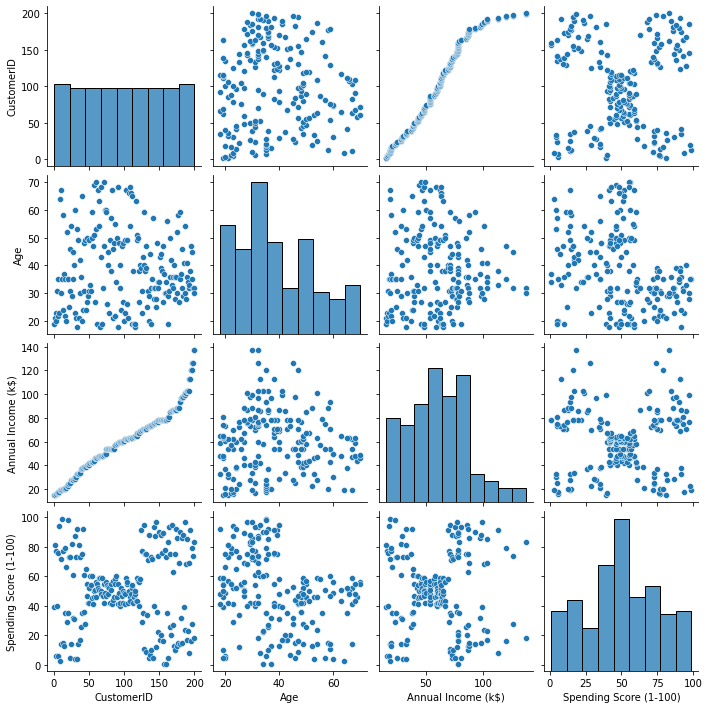

In [13]:
import seaborn as sns

sns.pairplot(data)

In [14]:
# Prepare the feature matrix
X = data.iloc[:, [3, 4]].values

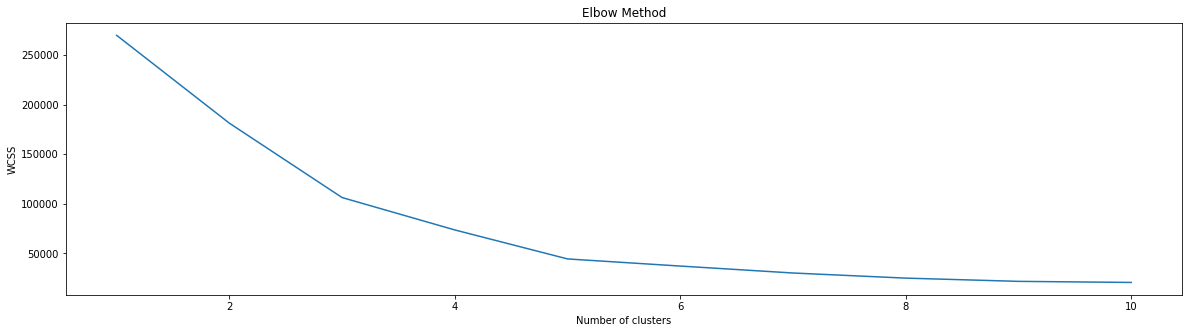

In [15]:
# Elbow method to find the optimal number of clusters
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(20,5))
plt.plot(range(1, 11), WCSS)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
# k-means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [17]:
# Silhouette Score
silhouette_score_kmeans = silhouette_score(X, y_kmeans)
print("Silhouette Score for KMeans:", silhouette_score_kmeans)

Silhouette Score for KMeans: 0.553931997444648


In [18]:
# k-means++ with 5 clusters
kmeans_plus_plus = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_plus_plus = kmeans_plus_plus.fit_predict(X)

In [19]:
# Silhouette Score
silhouette_score_kmeans_plus_plus = silhouette_score(X, y_kmeans_plus_plus)
print("Silhouette Score for KMeans++:", silhouette_score_kmeans_plus_plus)

Silhouette Score for KMeans++: 0.553931997444648


In [20]:
y_cluster = kmeans.fit_predict(X)

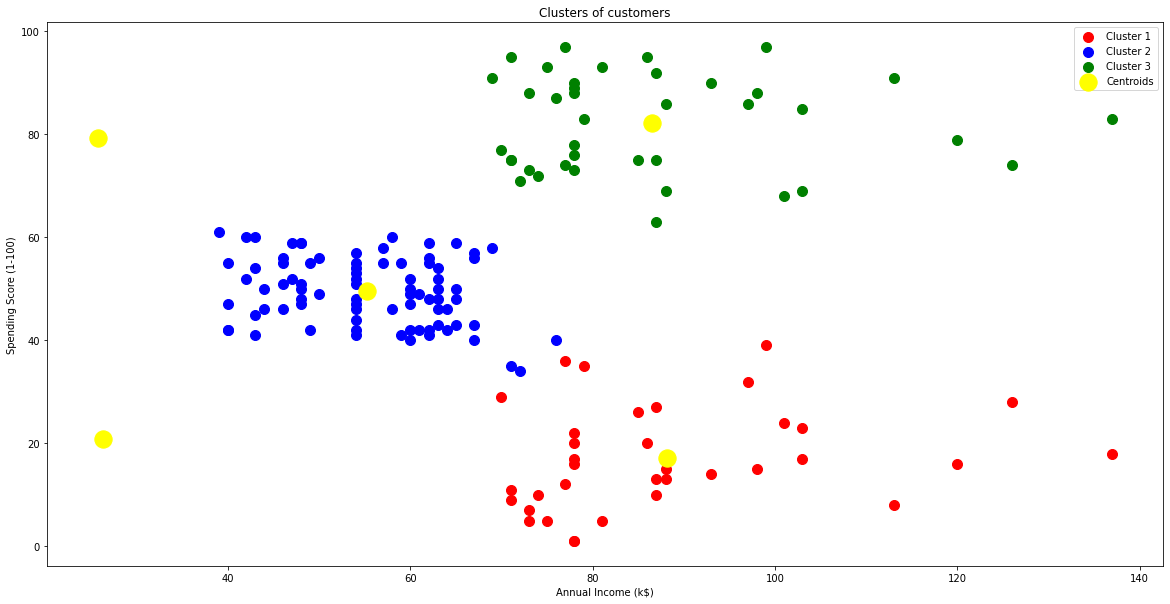

In [21]:
# Visualize the results

plt.figure(figsize=(20,10))
plt.scatter(X[y_cluster == 0, 0], X[y_cluster == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_cluster == 1, 0], X[y_cluster == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_cluster == 2, 0], X[y_cluster == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [23]:
# Perform hierarchical clustering with different numbers of clusters
n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for n in n_clusters:
    model = AgglomerativeClustering(n_clusters=n)
    labels = model.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

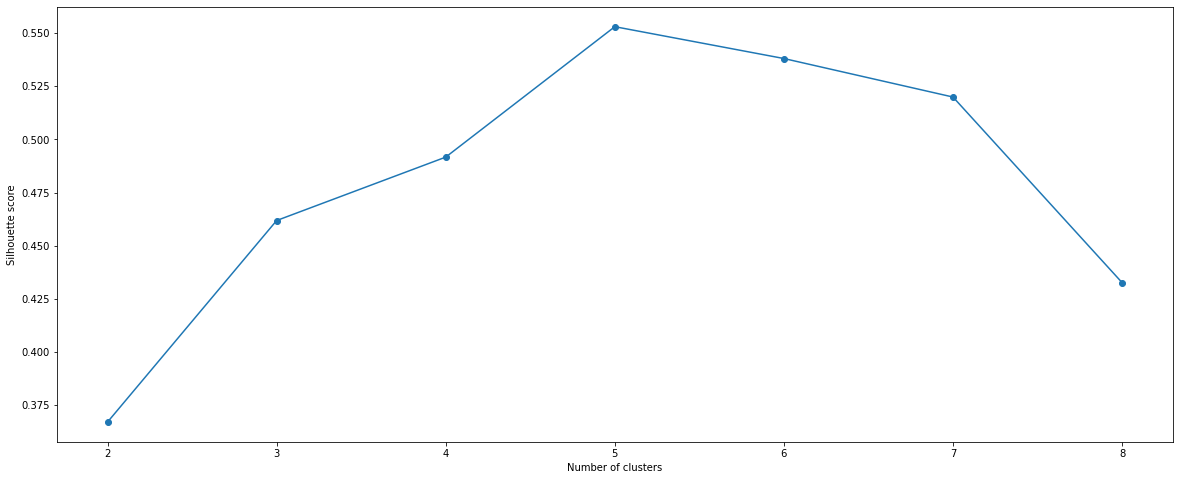

In [24]:
# Plot the silhouette scores

plt.figure(figsize=(20,8))
plt.plot(n_clusters, silhouette_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

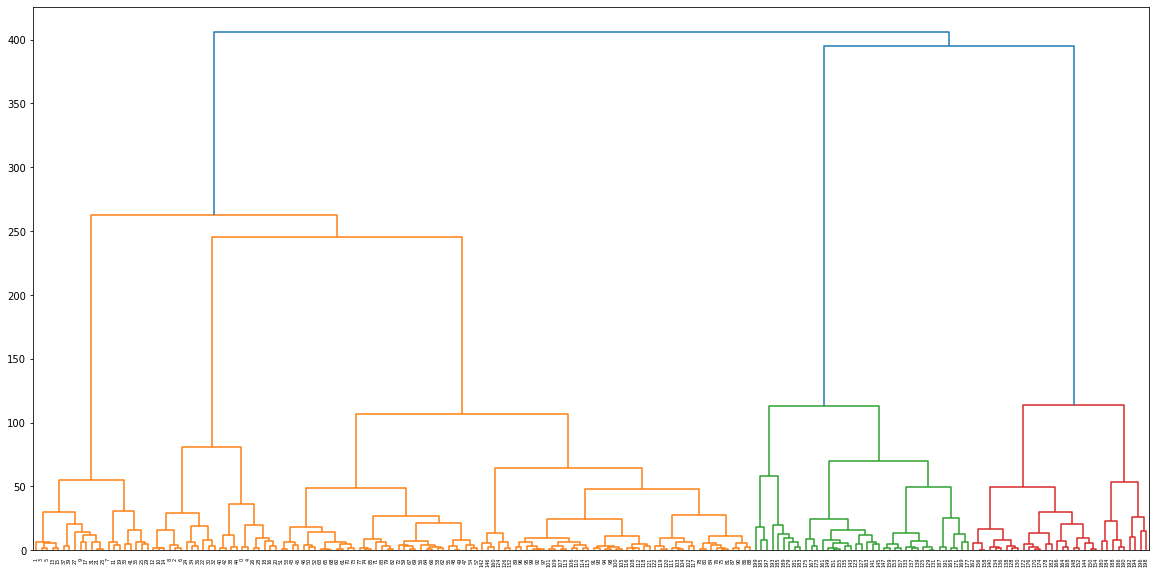

In [25]:
# Plot the dendrogram
plt.figure(figsize=(20,10))
Z = linkage(X, method='ward')
dendrogram(Z)
plt.show()

In [26]:
# Define a list to store the silhouette scores
sil_scores = []

# Perform hierarchical clustering for different numbers of clusters
for n_clusters in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    y_clusters = hc.fit(X)
    
    # Compute the silhouette score for each number of clusters
    sil_score = silhouette_score(X, hc.labels_)
    sil_scores.append(sil_score)

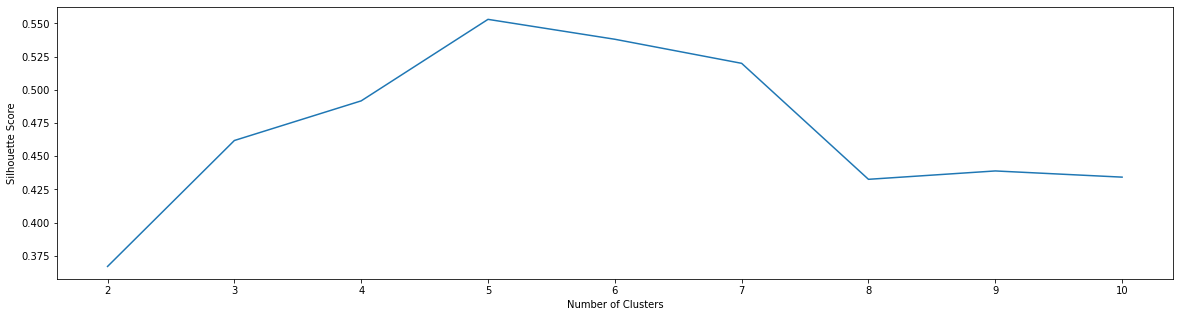

In [27]:
# Plot the silhouette scores to determine the optimal number of clusters

plt.figure(figsize=(20,5))
plt.plot(range(2, 11), sil_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [35]:
X = data.iloc[:, [3, 4]].values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [36]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

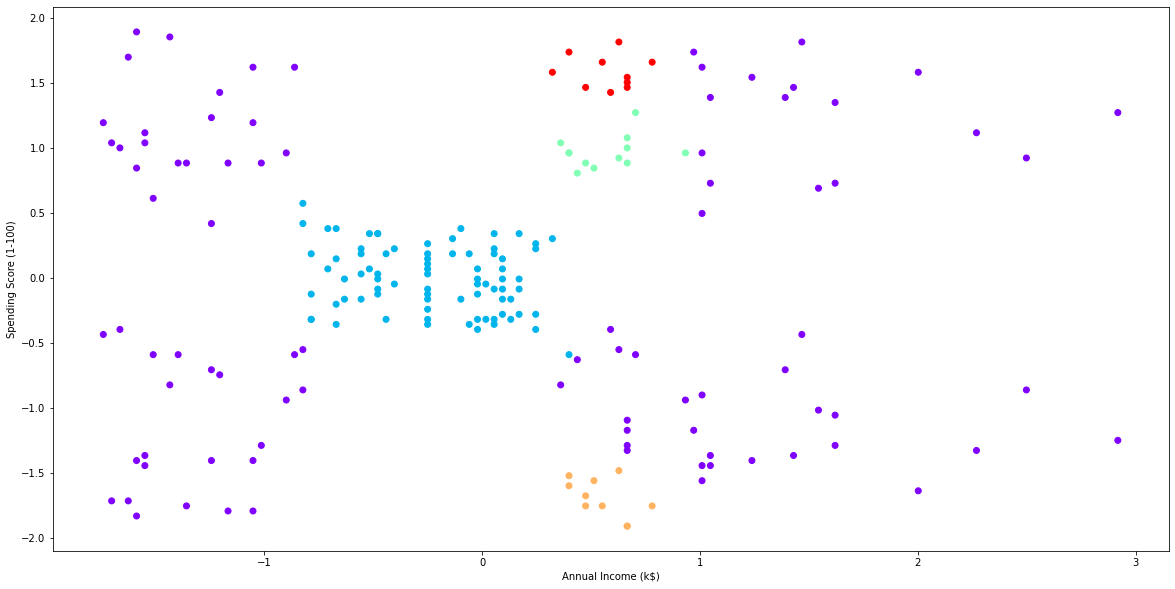

In [38]:
# Plot the data points with different colors representing different clusters

plt.figure(figsize=(20,10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [39]:
# Evaluate the output clusters
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
print('Number of clusters:', n_clusters_)

Number of clusters: 4


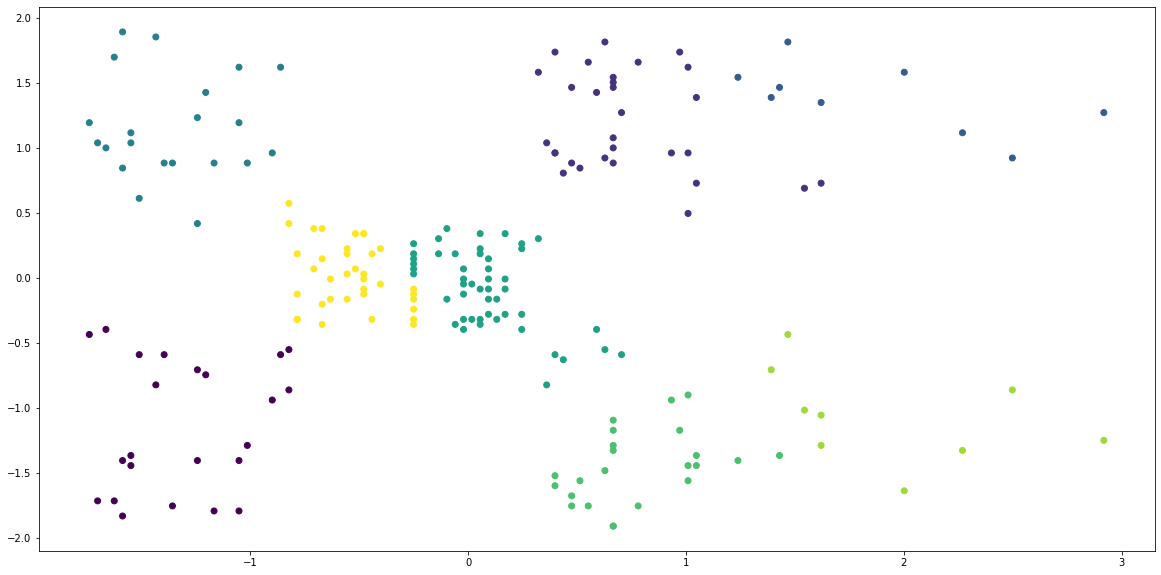

In [41]:
# Plot the clusters
plt.figure(figsize=(20,10))
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=model.labels_)
plt.show()

In [43]:
# Evaluate the model using adjusted rand index
from sklearn.metrics import adjusted_rand_score
label = model.labels_
ari = adjusted_rand_score(label, data['Annual Income (k$)'])
print("Adjusted Rand Index: {:.2f}".format(ari))

Adjusted Rand Index: 0.08
